<a href="https://colab.research.google.com/github/choeuneheol/python-practice/blob/master/%EB%AC%B8%EC%9E%AC%ED%95%B4%EA%B2%B0%EC%B1%85DAY5~6(%EB%B2%94%EC%A3%BC%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
# 데이터 경로

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [49]:
train.shape, test.shape

((300000, 25), (200000, 24))

In [50]:
train.head().T # T는 행과 열 위치를 바꿔줌


,0,1,2,3,4
id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada


In [51]:
submission.head()

,id,target
0,300000,0.5
1,300001,0.5
2,300002,0.5
3,300003,0.5
4,300004,0.5


In [52]:
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index' : '피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫 번째 값'] = df.loc[0].values
  summary['두 번째 값'] = df.loc[1].values
  summary['세 번째 값'] = df.loc[2].values

  return summary

resumetable(train)



데이터셋 형상: (300000, 25)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,id,int64,0,300000,0,1,2
1,bin_0,int64,0,2,0,0,0
2,bin_1,int64,0,2,0,1,0
3,bin_2,int64,0,2,0,0,0
4,bin_3,object,0,2,T,T,F
5,bin_4,object,0,2,Y,Y,Y
6,nom_0,object,0,3,Green,Green,Blue
7,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
8,nom_2,object,0,6,Snake,Hamster,Lion
9,nom_3,object,0,6,Finland,Russia,Russia


In [53]:
for i in range(3):
  feature = 'ord_'+ str(i)
  print((f'{feature} 고윳값: {train[feature].unique()}'))

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [54]:
for i in range(3,6):
  feature = 'ord_' + str(i)
  print(f'{feature} 고윳값 :{train[feature].unique()}')

ord_3 고윳값 :['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값 :['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값 :['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [55]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


In [56]:
# 데이터 시각화

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

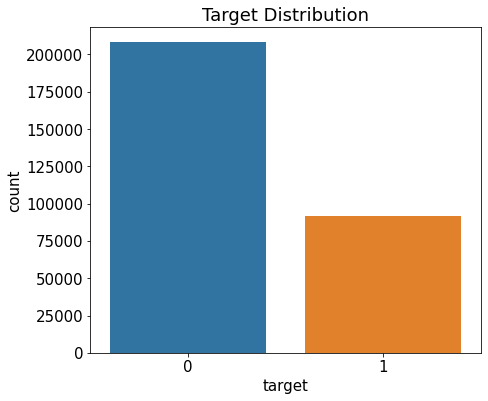

In [57]:
mpl.rc('font', size=15)   #폰트 크기 설정 
plt.figure(figsize=(7, 6))  #Figure 크기 설정

#타깃값 분포 카운트 플롯
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

In [58]:
print(ax.patches)

[<matplotlib.patches.Rectangle object at 0x7f10acf17f50>, <matplotlib.patches.Rectangle object at 0x7f109abb9050>]


In [59]:
rectangle =ax.patches[0] # 첫번째 Rectangle 객체
print('사각형 높이:',rectangle.get_height())
print('사각형 너비:',rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [60]:
print('텍스트 위치의 x좌표:', rectangle.get_x()+rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train) * 0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


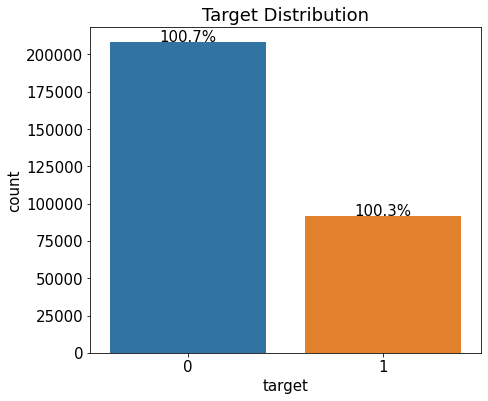

In [61]:
def write_percent(ax, total_size):
  '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
  for patch in ax.patches:              
    height = patch.get_height()         #도형 높이(데이터 개수)
    width = patch.get_width()           #도형 너비
    left_coord = patch.get_x()          #도형 왼쪽 테두리의 x축 위치 
    percent = height/total_size+100     #타깃값 비율


    ax.text(x=left_coord + width/2.0,         # X축 위치
            y=height + total_size*0.001,      # Y축 위치
            s=f'{percent:1.1f}%',             # 입력 텍스트
            ha = 'center')                    # 가운데 정렬
    
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution');

In [62]:
print(ax.patches)

[<matplotlib.patches.Rectangle object at 0x7f10ace3a150>, <matplotlib.patches.Rectangle object at 0x7f10acf62cd0>]


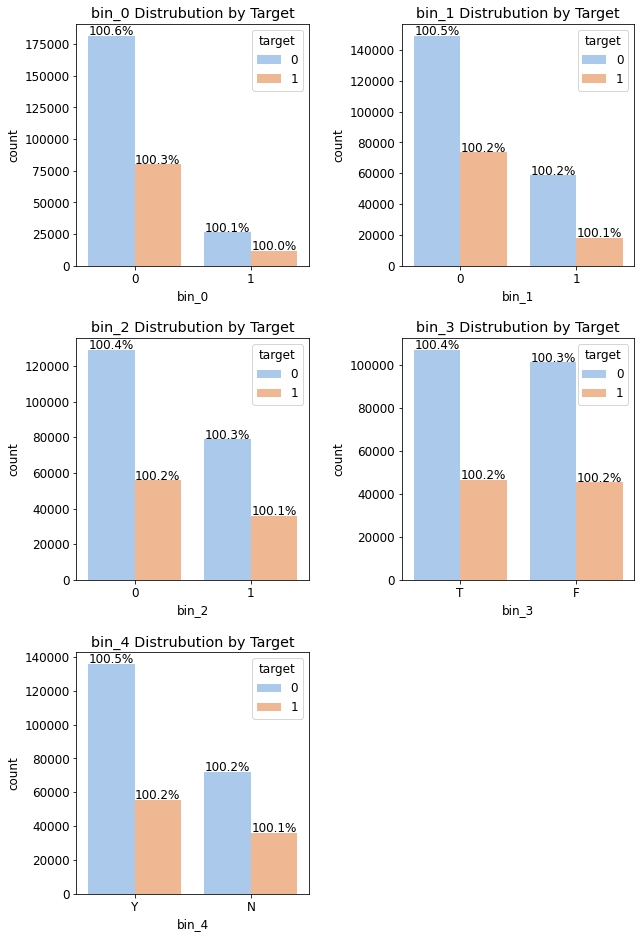

In [63]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(figure) 준비
mpl.rc('font', size=12) 
grid = gridspec.GridSpec(3,2)                 # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10,16))                   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3)   # 서브 플롯 간 좌우/상하 여백 설정


# 서브 플롯 그리기
bin_features = ['bin_0','bin_1','bin_2','bin_3','bin_4']  # 피처 목록

for idx, feature in enumerate(bin_features):
  ax = plt.subplot(grid[idx])

  # ax축에 타깃값 분포 카운트 플롯 그리기
  sns.countplot(x=feature,
                data=train,
                hue='target',
                palette='pastel',     #그래프 색상 설정
                ax=ax)
  
  ax.set_title(f'{feature} Distrubution by Target')   # 그래프 제목 설정
  write_percent(ax, len(train))                       # 비율 표시  

In [64]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [65]:
# # 정규화 후 비율을 백분율로 표현

crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index') * 100

In [66]:
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [67]:
crosstab=crosstab.reset_index() #인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [68]:
def get_crosstab(df, feature):
  crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
  crosstab = crosstab.reset_index()
  return crosstab

In [69]:
crosstab = get_crosstab(train,'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [70]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

In [71]:
#스텝2 : 포인트플롯 생성 함수 만들기

def plot_pointplot(ax, featurn, crosstab):
  ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성

  # 새로운 축에 포인트플롯 그리기 
  ax2 = sns.pointplot(x=featurn, y=1, data=crosstab,
                      order=crosstab[featurn].values,       # 포인트플롯 순서
                      color='black',                        # 포인트플롯 색상  
                      legend=False)                         # 범례 미표시
  ax.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)   # y축 범위 설정
  ax.set_ylabel('Tatget 1 Ratio(%)')

In [72]:
#스텝3 : 피처 분포도 및 피처별 타깃값 1 의 비율 포인트플롯 생성 함수 만들기

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols,
                                  size=(15,20)):
  plt.figure(figsize=size) # 전체 Figure 크기 설정
  grid = gridspec.GridSpec(num_rows, num_cols)    # 서브플롯 배치
  plt.subplots_adjust(wspace=0.45, hspace=0.3)    # 서브플롯 좌우/상하 여백 설정

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    crosstab = get_crosstab(df, feature)          # 교차분석표 생성

    #ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=df,
                  order=crosstab[feature].values,
                  color='skyblue',
                  ax=ax)
    
    write_percent(ax, len(df))                    # 비율 표시

    plot_pointplot(ax, feature, crosstab)         # 포인트플롯 그리기

    ax.set_title(f'{feature} Distribution')       # 그래프 제목 설정

In [73]:
nom_features = ['nom_0','nom_1','nom_2','nom_3','nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

ValueError: ignored

<Figure size 1080x1440 with 10 Axes>

In [74]:
ord_features = ['ord_0','ord_1','ord_2','ord_3']
plot_cat_dist_with_true_ratio(train, ord_features,
                              num_rows=2, num_cols=2, size=(15,12))

ValueError: ignored

<Figure size 1080x864 with 8 Axes>

In [77]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice','Contributor','Expert','Master','Grandmaster']
ord_2_value = ['Freezing','Cold','Warm','Boiling Hot','Lva Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

In [78]:
plot_cat_dist_with_true_ratio(train, ord_features,
                              num_rows=2, num_cols=2, size=(15,12))

ValueError: ignored

<Figure size 1080x864 with 8 Axes>

In [82]:
plot_cat_dist_with_true_ratio(train,['ord_4','ord_5'],
                              num_rows=2, num_cols=1, size=(6,7))

ValueError: ignored

<Figure size 432x504 with 4 Axes>

In [83]:
#날짜 피처 분포

date_features = ['day','month']
plot_cat_dist_with_true_ratio(train, date_features,
                              num_rows=2, num_cols=1, size=(10,10))

ValueError: ignored

<Figure size 720x720 with 4 Axes>